In [28]:
import numpy as np
import sounddevice as sd
import librosa
import matplotlib.pyplot as plt

In [24]:
fs = 44100
duration = 3  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.wait()

In [25]:
myrecording

array([[ 0.0000000e+00,  0.0000000e+00],
       [-3.0517578e-05,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.6558838e-01,  1.6726685e-01],
       [ 1.5713501e-01,  1.5771484e-01],
       [ 1.6455078e-01,  1.6433716e-01]], dtype=float32)

In [26]:
frequency = np.abs(librosa.stft(myrecording))

In [23]:
frequency

array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[3.0517578e-05],
        [3.0517578e-05],
        [3.0517578e-05],
        ...,
        [3.0517578e-05],
        [3.0517578e-05],
        [3.0517578e-05]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[1.5231305e-01],
        [1.5231287e-01],
        [1.5231234e-01],
        ...,
        [1.2784593e-03],
        [1.2127236e-03],
        [1.1900050e-03]],

       [[1.5222150e-01],
        [1.5222132e-01],
        [1.5222079e-01],
        ...,
        [1.8304086e-03],
        [1.7851737e-03],
        [1.7698384e-03]],

       [[1.5011579e-01],
        [1.5011561e-01],
        [1.5011509e-01],
        ...,
        [1.7992561e-03],
        [1.7544985e-03],
        [1.7393233e-03]]

ValueError: For X (1026) and Y (132301) with flat shading, A should have shape (132300, 1025, 3) or (132300, 1025, 4) or (132300, 1025) or (135607500,), not (132300, 1025, 1)

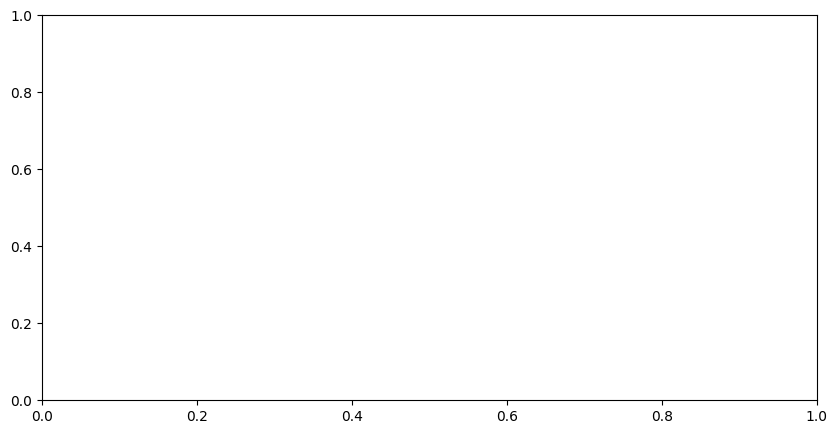

In [29]:
power_spectrogram = librosa.amplitude_to_db(frequency, ref=np.max)
sr = 44100
# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(power_spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
plt.show()